In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import Model

### Goal : Diabetes Prediction of the Pima Indians
##### The code in this file was written based on the Github repository at the link below.
##### https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/02_Pima_Indian.ipynb

### Example data load
#### Load the Pima Indian Diabetes dataset. When loading, specify the name corresponding to each column.

In [4]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/pima-indians-diabetes.csv'
Dataset = pd.read_csv(url, names=['pregnant','plasma','pressure','thickness','insulin','BMI','predigree','age','class'])

### Dataset overview
#### 1.Structure 

In [10]:
Dataset

,pregnant,plasma,pressure,thickness,insulin,BMI,predigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### 2.Variable types 

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 3.Descriptive statistics 

In [11]:
Dataset.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,predigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 4.Visualize the correlation between data

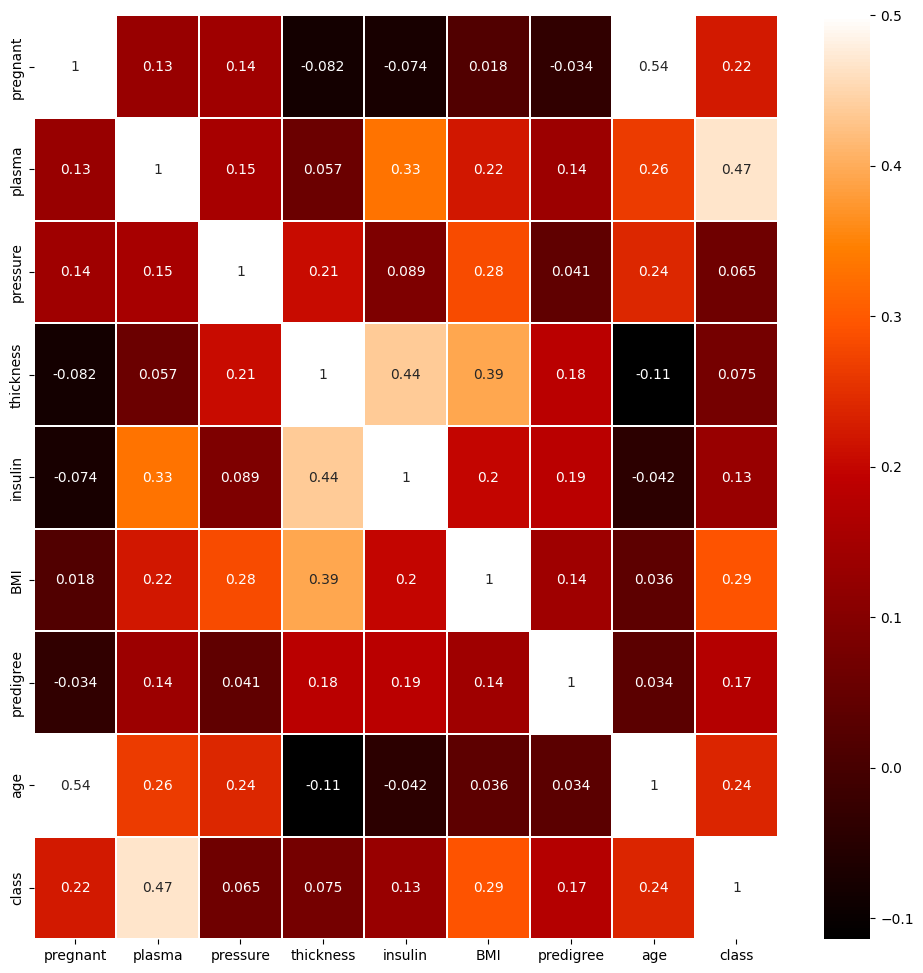

In [15]:
colormap = plt.cm.gist_heat   #Setting colormap
plt.figure(figsize=(12,12))   #Setting the graph size

# vmax : 0.5 -> The closer to 0.5, the brighter the color.
sns.heatmap(Dataset.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

### Deep learning 

#### Convert pandas dataframe into numpy data

In [22]:
X = Dataset.values[:, :8]
Y = Dataset.values[:, 8:]
X.shape, Y.shape

((768, 8), (768, 1))

#### Set up the model

In [31]:
## Input layer with 17 features
InpLayer = Input(shape=(X.shape[-1]), name='Inp')

## Hidden layer 1 with a 2D wiegh matrix (8 , 5) and a 2D bias matrix (1, 5)
HL1 = Dense(5, activation='tanh', name='HL1')(InpLayer)

## Hidden layer 2 with a 2D wiegh matrix (5 , 3) and a 2D bias matrix (1, 3)
HL2 = Dense(3, activation='tanh', name='HL2')(HL1)

## Output layer a 2D wiegh matrix (3 , 1) and a 2D bias matrix (1, 1)
Out = Dense(1, activation='sigmoid', name='Out')(HL2)

### Defining the model by specifying inputs and outputs
model = Model(InpLayer, Out)
model.summary()

#### Compliling the model
model.compile(loss='BCE', optimizer='adam')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inp (InputLayer)             [(None, 8)]               0         
_________________________________________________________________
HL1 (Dense)                  (None, 5)                 45        
_________________________________________________________________
HL2 (Dense)                  (None, 3)                 18        
_________________________________________________________________
Out (Dense)                  (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X,Y, validation_split=0.2, epochs=200, batch_size=200)
Logs = model.history.history

Epoch 1/200
4/4 [==============================] - 0s 32ms/step - loss: 0.8772 - val_loss: 0.8877
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.8539 - val_loss: 0.8785
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.8375 - val_loss: 0.8678
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.8174 - val_loss: 0.8495
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.8103 - val_loss: 0.8372
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.8017 - val_loss: 0.8292
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7856 - val_loss: 0.8231
Epoch 8/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7755 - val_loss: 0.8214
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.7649 - val_loss: 0.8205
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 0.7586 - val_loss: 0.8181
Epoch 11/200
4/4 [=

### Visualization of losses

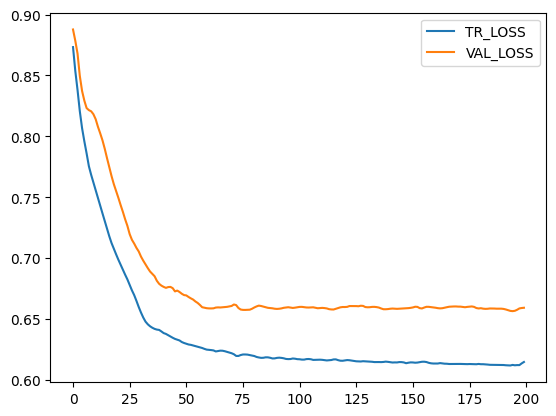

In [33]:
import matplotlib.pyplot as plt
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()